In [1]:
pip install GEOparse

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Importing necessary libraries

In [7]:
#Importing a series of libraries used throughout the pipeline
import GEOparse
import pandas as pd
import numpy as np
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.decomposition import PCA
import requests
# os.chdir('../Data')
# os.chdir('../Scripts')
# from microarray_analysis import *

### Download data from NCBI GEO based on the GEO accession ID

In [8]:
#The series accession id for the study you are analyzing
geo_accession_id = "GSE40279"

In [9]:
#Parse the GEO data using the Accession ID
gse = GEOparse.get_GEO(geo=geo_accession_id, destdir="./")

06-Sep-2023 16:01:12 DEBUG utils - Directory ./ already exists. Skipping.
06-Sep-2023 16:01:12 INFO GEOparse - File already exist: using local version.
06-Sep-2023 16:01:12 INFO GEOparse - Parsing ./GSE40279_family.soft.gz: 
06-Sep-2023 16:01:12 DEBUG GEOparse - DATABASE: GeoMiame
06-Sep-2023 16:01:12 DEBUG GEOparse - SERIES: GSE40279
06-Sep-2023 16:01:12 DEBUG GEOparse - PLATFORM: GPL13534
c:\Users\tokyo\AppData\Local\Programs\Python\Python311\Lib\site-packages\GEOparse\GEOparse.py:401: DtypeWarning: Columns (11,14,15,36) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
06-Sep-2023 16:01:16 DEBUG GEOparse - SAMPLE: GSM989827
06-Sep-2023 16:01:17 DEBUG GEOparse - SAMPLE: GSM989828
06-Sep-2023 16:01:17 DEBUG GEOparse - SAMPLE: GSM989829
06-Sep-2023 16:01:18 DEBUG GEOparse - SAMPLE: GSM989830
06-Sep-2023 16:01:18 DEBUG GEOparse - SAMPLE: GSM989831
06-Sep-2023 16:01:19 DEBUG GEOparse - SAMPLE: GSM989832
0

### Extract expression value (beta value) for each probes corresponding to each samples

In [10]:
#Visualization of expression matrix
pivoted_samples = gse.pivot_samples('VALUE')
pivoted_samples.head()

name,GSM989827,GSM989828,GSM989829,GSM989830,GSM989831,GSM989832,GSM989833,GSM989834,GSM989835,GSM989836,...,GSM990618,GSM990619,GSM990620,GSM990621,GSM990622,GSM990623,GSM990624,GSM990625,GSM990626,GSM990627
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.464197,0.454883,0.485764,0.480785,0.501220,0.499918,0.485852,0.512442,0.518155,0.417986,...,0.560958,0.472081,0.508502,0.505193,0.443411,0.527496,0.588331,0.362994,0.499145,0.458600
cg00000108,0.941091,0.939033,0.918802,0.929908,0.934548,0.950543,0.925855,0.941330,0.938528,0.933814,...,0.934699,0.978612,0.922024,0.963052,0.992631,0.958173,0.982450,0.954392,0.931690,0.974731
cg00000109,0.911182,0.596455,0.870333,0.889689,0.890450,0.898493,0.893972,0.892010,0.900841,0.883539,...,0.881957,0.926289,0.930091,0.946547,0.929131,0.922034,0.855145,0.927184,0.900938,0.829869
cg00000165,0.132014,0.206917,0.162861,0.197780,0.148437,0.224093,0.400489,0.194553,0.134710,0.204569,...,0.199883,0.165116,0.210248,0.177351,0.118742,0.223068,0.162180,0.196430,0.167477,0.170578
cg00000236,0.717861,0.723935,0.719196,0.704061,0.754913,0.829192,0.723782,0.695142,0.731872,0.742913,...,0.759011,0.792883,0.730367,0.783830,0.787089,0.778959,0.796868,0.713020,0.730215,0.782844


#### Check information of this data

In [11]:
#Determine the total amount of probes used in the study
pivoted_samples_average = pivoted_samples.median(axis=1)
print("Number of probes before filtering: ", len(pivoted_samples_average))

Number of probes before filtering:  473034


In [12]:
metadata = gse.metadata
print(metadata)

{'title': ['Genome-wide Methylation Profiles Reveal Quantitative Views of Human Aging Rates'], 'geo_accession': ['GSE40279'], 'status': ['Public on Nov 21 2012'], 'submission_date': ['Aug 21 2012'], 'last_update_date': ['Jul 06 2022'], 'pubmed_id': ['23177740'], 'summary': ['Genome wide DNA methylation profiling of individuals across a large age range. The Illumina Infinium 450k Human DNA methylation Beadchip was used to obtain DNA methylation profiles across approximately 450k CpGs from human whole blood.'], 'overall_design': ['Bisulphite converted DNA from the 656 samples were hybridised to the Illumina Infinium 450k Human Methylation Beadchip'], 'type': ['Methylation profiling by array'], 'contributor': ['K,,Zhang', 'T,,Ideker'], 'sample_id': ['GSM989827', 'GSM989828', 'GSM989829', 'GSM989830', 'GSM989831', 'GSM989832', 'GSM989833', 'GSM989834', 'GSM989835', 'GSM989836', 'GSM989837', 'GSM989838', 'GSM989839', 'GSM989840', 'GSM989841', 'GSM989842', 'GSM989843', 'GSM989844', 'GSM98984

In [13]:
phenotype_data = gse.phenotype_data
print(phenotype_data.head())

                  title geo_accession                 status submission_date  \
GSM989827  age 67y 1001     GSM989827  Public on Nov 21 2012     Aug 21 2012   
GSM989828  age 89y 1002     GSM989828  Public on Nov 21 2012     Aug 21 2012   
GSM989829  age 66y 1003     GSM989829  Public on Nov 21 2012     Aug 21 2012   
GSM989830  age 64y 1004     GSM989830  Public on Nov 21 2012     Aug 21 2012   
GSM989831  age 62y 1005     GSM989831  Public on Nov 21 2012     Aug 21 2012   

          last_update_date     type channel_count source_name_ch1  \
GSM989827      Nov 21 2012  genomic             1           X1001   
GSM989828      Nov 21 2012  genomic             1           X1002   
GSM989829      Nov 21 2012  genomic             1           X1003   
GSM989830      Nov 21 2012  genomic             1           X1004   
GSM989831      Nov 21 2012  genomic             1           X1005   

           organism_ch1 taxid_ch1  ...                contact_email  \
GSM989827  Homo sapiens      9606

In [14]:
print(phenotype_data.columns)

Index(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'type', 'channel_count', 'source_name_ch1',
       'organism_ch1', 'taxid_ch1', 'characteristics_ch1.0.age (y)',
       'characteristics_ch1.1.source', 'characteristics_ch1.2.plate',
       'characteristics_ch1.3.gender', 'characteristics_ch1.4.ethnicity',
       'characteristics_ch1.5.tissue', 'molecule_ch1', 'extract_protocol_ch1',
       'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol',
       'description', 'data_processing', 'platform_id', 'contact_name',
       'contact_email', 'contact_institute', 'contact_address', 'contact_city',
       'contact_state', 'contact_zip/postal_code', 'contact_country',
       'supplementary_file', 'series_id', 'data_row_count'],
      dtype='object')


In [15]:
# Assuming 'phenotype_data' is the DataFrame with sample information
# Extract the 'title' and 'characteristics_ch1.0.age (y)' columns
sample_age_gender_data = phenotype_data[['characteristics_ch1.0.age (y)', 'characteristics_ch1.3.gender']]

# Rename the columns for clarity
sample_age_gender_data.columns = ['Age', 'Gender']

# Display the new DataFrame
print(sample_age_gender_data)


          Age Gender
GSM989827  67      F
GSM989828  89      F
GSM989829  66      F
GSM989830  64      F
GSM989831  62      F
...        ..    ...
GSM990623  78      F
GSM990624  71      M
GSM990625  68      M
GSM990626  61      F
GSM990627  73      M

[656 rows x 2 columns]


### Multiple linear regression model applied to each probes by 'sklearn'
#### Note: Do not contain p.values for each variables, only coefficients.

In [16]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Create an empty list to store the results
results_list = []

# Loop through each row (probe) in the pivoted_samples DataFrame
for index, row in pivoted_samples.iterrows():
    # Extract Age, Gender, and Expression data for the current probe
    age_gender_data = sample_age_gender_data.copy()  # Create a copy to avoid modifying the original data
    age_gender_data['Expression'] = row.values
    
    # Encode 'Gender' using binary encoding (0 for 'M', 1 for 'F')
    age_gender_data['Gender'] = age_gender_data['Gender'].map({'M': 0, 'F': 1})
    
    # Impute missing values (NaN) with mean values for both Age, Gender, and Expression
    imputer = SimpleImputer(strategy='mean')
    age_gender_data = imputer.fit_transform(age_gender_data)
    
    # Separate independent variables (Age and Gender) and dependent variable (Expression)
    X = age_gender_data[:, :-1]  # All columns except the last one (Expression)
    y = age_gender_data[:, -1]   # Last column (Expression)
    
    # Check if there's only one independent variable (Age)
    if X.shape[1] == 1:
        X = X.reshape(-1, 1)  # Reshape X to have two dimensions
        
    # Fit the linear regression model
    model = LinearRegression().fit(X, y)
    
    # Calculate R-squared
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    
    # Append results to the results list
    results_list.append({'Probe_ID': index, 'coef_Age': model.coef_[0], 'coef_Gender': model.coef_[1] if X.shape[1] > 1 else None, 'R-squared': r_squared})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df.head())

     Probe_ID  coef_Age  coef_Gender  R-squared
0  cg00000029 -0.001007     0.026972   0.082769
1  cg00000108  0.000076     0.001264   0.003868
2  cg00000109  0.000092     0.002138   0.002723
3  cg00000165  0.000265     0.002727   0.008202
4  cg00000236  0.000139     0.007146   0.010341


In [17]:
# Sort the results_df DataFrame by 'R-squared' column in descending order
results_df = results_df.sort_values(by='R-squared', ascending=False)
# Print the sorted results DataFrame
print(results_df.head())

          Probe_ID  coef_Age  coef_Gender  R-squared
87051   cg04462931  0.000204     0.400134   0.970963
217983  cg11955727  0.000169     0.261685   0.957005
315555  cg17765025 -0.000058     0.229386   0.935353
8226    cg00399683  0.000115     0.240899   0.928524
233448  cg12949927  0.000183     0.232580   0.925232


### For debugging : Multiple linear regression model applied to only a probe by 'sklearn'.
#### Note: Do not contain p.values for each variables, only coefficients.

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

from scipy import stats
from statsmodels.stats.multitest import multipletests


# Specify the probe ID you want to analyze
specific_probe_id = 'cg10501210'  # Replace with the specific probe ID you're interested in

# Create an empty list to store the results
results_list_one = []

# Extract Age, Gender, and Expression data for the specific probe
age_gender_data = sample_age_gender_data.copy()  # Create a copy to avoid modifying the original data
age_gender_data['Expression'] = pivoted_samples.loc[specific_probe_id].values

# Encode 'Gender' using binary encoding (0 for 'M', 1 for 'F')
age_gender_data['Gender'] = age_gender_data['Gender'].map({'M': 0, 'F': 1})

# Impute missing values (NaN) with mean values for both Age, Gender, and Expression
imputer = SimpleImputer(strategy='mean')
age_gender_data = imputer.fit_transform(age_gender_data)

# Separate independent variables (Age and Gender) and dependent variable (Expression)
X = age_gender_data[:, :-1]  # All columns except the last one (Expression)
y = age_gender_data[:, -1]   # Last column (Expression)

# Check if there's only one independent variable (Age)
if X.shape[1] == 1:
    X = X.reshape(-1, 1)  # Reshape X to have two dimensions

# Fit the linear regression model
model = LinearRegression().fit(X, y)

# Calculate R-squared
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

# Append results to the results list
results_list_one.append({'Probe_ID': specific_probe_id, 'coef_Age': model.coef_[0], 'coef_Gender': model.coef_[1] if X.shape[1] > 1 else None, 'R-squared': r_squared})

# Convert the results list to a DataFrame
results_df_one = pd.DataFrame(results_list_one)

# Print the results for the specific probe
print(results_df_one)


     Probe_ID  coef_Age  coef_Gender  R-squared
0  cg10501210 -0.007908     0.002926   0.527211


In [33]:
# Check age_gender_data
print(pd.DataFrame(age_gender_data))

        0    1         2
0    67.0  1.0  0.418132
1    89.0  1.0  0.194307
2    66.0  1.0  0.417227
3    64.0  1.0  0.636075
4    62.0  1.0  0.394391
..    ...  ...       ...
651  78.0  1.0  0.489399
652  71.0  0.0  0.381109
653  68.0  0.0  0.355581
654  61.0  1.0  0.513889
655  73.0  0.0  0.353330

[656 rows x 3 columns]


In [26]:
print(model.coef_)

[-0.0079076   0.00292639]


In [27]:
# Check model
print(model.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

### For debugging : Multiple linear regression model applied to only a probe by 'statsmodels'
#### Note: Containing p.values and coefficients for each variables.

In [37]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Specify the probe ID you want to analyze
specific_probe_id = 'cg10501210'  # Replace with the specific probe ID you're interested in

# Create an empty list to store the results
results_list_one = []

# Extract Age, Gender, and Expression data for the specific probe
age_gender_data = sample_age_gender_data.copy()  # Create a copy to avoid modifying the original data
age_gender_data['Expression'] = pivoted_samples.loc[specific_probe_id].values

# Encode 'Gender' using binary encoding (0 for 'M', 1 for 'F')
age_gender_data['Gender'] = age_gender_data['Gender'].map({'M': 0, 'F': 1})

# Impute missing values (NaN) with mean values for both Age, Gender, and Expression
imputer = SimpleImputer(strategy='mean')
age_gender_data = imputer.fit_transform(age_gender_data)

# Separate independent variables (Age and Gender) and dependent variable (Expression)
X = age_gender_data[:, :-1]  # All columns except the last one (Expression)
y = age_gender_data[:, -1]   # Last column (Expression)

# Check if there's only one independent variable (Age)
if X.shape[1] == 1:
    X = X.reshape(-1, 1)  # Reshape X to have two dimensions

# Add a constant term for the intercept in the linear regression model
X = sm.add_constant(X)

# Fit the linear regression model using statsmodels
model = sm.OLS(y, X).fit()

# Extract the p-values for each coefficient
p_values = model.pvalues

# Calculate R-squared
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

# Append results to the results list and add p-values
results_list_one.append({'Probe_ID': specific_probe_id, 
                         'coef_Age': model.params[1], 
                         'p-value_Age': p_values[1],  # Add p-value for Age
                         'coef_Gender': model.params[2] if X.shape[1] > 2 else None, 
                         'p-value_Gender': p_values[2] if X.shape[1] > 2 else None,  # Add p-value for Gender
                         'R-squared': r_squared})

# Convert the results list to a DataFrame
results_df_one = pd.DataFrame(results_list_one)

# Print the results for the specific probe, including p-values
print(results_df_one)

# Print p-values for each coefficient
print("P-values:")
print(p_values)

     Probe_ID  coef_Age    p-value_Age  coef_Gender  p-value_Gender  R-squared
0  cg10501210 -0.007908  2.848238e-108     0.002926        0.734849   0.527211
P-values:
[2.68221121e-237 2.84823768e-108 7.34849143e-001]


In [38]:
# Check the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     364.1
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          6.01e-107
Time:                        16:39:54   Log-Likelihood:                 515.79
No. Observations:                 656   AIC:                            -1026.
Df Residuals:                     653   BIC:                            -1012.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0331      0.020     52.676      0.0

In [39]:
# Check model
print(age_gender_data)

[[67.         1.         0.4181316]
 [89.         1.         0.1943066]
 [66.         1.         0.417227 ]
 ...
 [68.         0.         0.3555807]
 [61.         1.         0.5138895]
 [73.         0.         0.3533303]]


### Multiple linear regression model applied to each probes by 'statsmodels'
#### Note: Containing p.values and coefficients for each variables.

In [40]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Create an empty list to store the results
results_list = []

# Loop through each row (probe) in the pivoted_samples DataFrame
for index, row in pivoted_samples.iterrows():
    # Extract Age, Gender, and Expression data for the current probe
    age_gender_data = sample_age_gender_data.copy()  # Create a copy to avoid modifying the original data
    age_gender_data['Expression'] = row.values
    
    # Encode 'Gender' using binary encoding (0 for 'M', 1 for 'F')
    age_gender_data['Gender'] = age_gender_data['Gender'].map({'M': 0, 'F': 1})
    
    # Impute missing values (NaN) with mean values for both Age, Gender, and Expression
    imputer = SimpleImputer(strategy='mean')
    age_gender_data = imputer.fit_transform(age_gender_data)
    
    # Separate independent variables (Age and Gender) and dependent variable (Expression)
    X = age_gender_data[:, :-1]  # All columns except the last one (Expression)
    y = age_gender_data[:, -1]   # Last column (Expression)
    
    # Check if there's only one independent variable (Age)
    if X.shape[1] == 1:
        X = X.reshape(-1, 1)  # Reshape X to have two dimensions
        
    # Add a constant term for the intercept in the linear regression model
    X = sm.add_constant(X)
    
    # Fit the linear regression model using statsmodels
    model = sm.OLS(y, X).fit()
    
    # Extract the coefficients and p-values for each coefficient
    coefficients = model.params
    p_values = model.pvalues
    
    # Calculate R-squared
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    
    # Append results to the results list
    results_list.append({'Probe_ID': index, 
                         'coef_Intercept': coefficients[0],  # Add coefficient for Intercept
                         'coef_Age': coefficients[1], 
                         'p-value_Age': p_values[1],  # Add p-value for Age
                         'coef_Gender': coefficients[2] if X.shape[1] > 2 else None, 
                         'p-value_Gender': p_values[2] if X.shape[1] > 2 else None,  # Add p-value for Gender
                         'R-squared': r_squared})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list)

# Print the results DataFrame
print(results_df.head())

     Probe_ID  coef_Intercept  coef_Age   p-value_Age  coef_Gender  \
0  cg00000029        0.526714 -0.001007  1.134160e-08     0.026972   
1  cg00000108        0.938803  0.000076  1.730276e-01     0.001264   
2  cg00000109        0.885890  0.000092  3.026628e-01     0.002138   
3  cg00000165        0.164297  0.000265  3.049571e-02     0.002727   
4  cg00000236        0.733806  0.000139  2.008331e-01     0.007146   

   p-value_Gender  R-squared  
0    2.006768e-07   0.082769  
1    4.409278e-01   0.003868  
2    4.184225e-01   0.002723  
3    4.497253e-01   0.008202  
4    2.618137e-02   0.010341  


In [ ]:
# Sort the results_df DataFrame by 'R-squared' column in descending order
results_df = results_df.sort_values(by='p-value_Age', ascending=True)

# Print the sorted results DataFrame
print(results_df.head())

          Probe_ID  coef_Intercept  coef_Age    p-value_Age  coef_Gender  \
301866  cg16867657        0.373301  0.004643  1.427136e-191    -0.001463   
125881  cg06639320        0.293085  0.002808  9.723102e-118     0.002437   
422693  cg24724428        0.003555  0.003980  1.524894e-116     0.002328   
386707  cg22454769        0.334440  0.004057  2.611863e-116     0.000750   
194163  cg10501210        1.033093 -0.007908  2.848238e-108     0.002926   

        p-value_Gender  R-squared  
301866        0.647426   0.737169  
125881        0.398382   0.558645  
422693        0.572109   0.554616  
386707        0.858505   0.553549  
194163        0.734849   0.527211  


### Adjust p.values by BH method for multiple testing

In [ ]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [ ]:
# Apply the Benjamini-Hochberg correction
results_df['Adjusted_p-value_Age'] = multipletests(results_df['p-value_Age'], method='fdr_bh')[1]
results_df['Adjusted_p-value_Gender'] = multipletests(results_df['p-value_Gender'], method='fdr_bh')[1]

In [ ]:
print(results_df.head())

          Probe_ID  coef_Intercept  coef_Age    p-value_Age  coef_Gender  \
301866  cg16867657        0.373301  0.004643  1.427136e-191    -0.001463   
125881  cg06639320        0.293085  0.002808  9.723102e-118     0.002437   
422693  cg24724428        0.003555  0.003980  1.524894e-116     0.002328   
386707  cg22454769        0.334440  0.004057  2.611863e-116     0.000750   
194163  cg10501210        1.033093 -0.007908  2.848238e-108     0.002926   

        p-value_Gender  R-squared  Adjusted_p-value_Age  \
301866        0.647426   0.737169         6.750841e-186   
125881        0.398382   0.558645         2.299679e-112   
422693        0.572109   0.554616         2.404423e-111   
386707        0.858505   0.553549         3.088750e-111   
194163        0.734849   0.527211         2.694627e-103   

        Adjusted_p-value_Gender  
301866                 0.868267  
125881                 0.724391  
422693                 0.831329  
386707                 0.954521  
194163            

In [ ]:
# Sort the results_df DataFrame by 'R-squared' column in descending order
results_df = results_df.sort_values(by='R-squared', ascending=False)

# Print the sorted results DataFrame
print(results_df.head())

          Probe_ID  coef_Intercept  coef_Age  p-value_Age  coef_Gender  \
87051   cg04462931        0.451527  0.000204     0.026797     0.400134   
217983  cg11955727        0.582826  0.000169     0.022359     0.261685   
315555  cg17765025        0.568103 -0.000058     0.473091     0.229386   
8226    cg00399683        0.583450  0.000115     0.195509     0.240899   
233448  cg12949927        0.617390  0.000183     0.037384     0.232580   

        p-value_Gender  R-squared  Adjusted_p-value_Age  \
87051              0.0   0.970963              0.062213   
217983             0.0   0.957005              0.053590   
315555             0.0   0.935353              0.594971   
8226               0.0   0.928524              0.305902   
233448             0.0   0.925232              0.081718   

        Adjusted_p-value_Gender  
87051                       0.0  
217983                      0.0  
315555                      0.0  
8226                        0.0  
233448                      0.

### Filter the probes

#### Probes with R-squared > 0.7

In [ ]:
# Filter the probes with R-squared > 0.7
results_df_07 = results_df[results_df['R-squared'] > 0.7]

# Print the filtered DataFrame
print(results_df_07.head())

          Probe_ID  coef_Intercept  coef_Age  p-value_Age  coef_Gender  \
87051   cg04462931        0.451527  0.000204     0.026797     0.400134   
217983  cg11955727        0.582826  0.000169     0.022359     0.261685   
315555  cg17765025        0.568103 -0.000058     0.473091     0.229386   
8226    cg00399683        0.583450  0.000115     0.195509     0.240899   
233448  cg12949927        0.617390  0.000183     0.037384     0.232580   

        p-value_Gender  R-squared  Adjusted_p-value_Age  \
87051              0.0   0.970963              0.062213   
217983             0.0   0.957005              0.053590   
315555             0.0   0.935353              0.594971   
8226               0.0   0.928524              0.305902   
233448             0.0   0.925232              0.081718   

        Adjusted_p-value_Gender  
87051                       0.0  
217983                      0.0  
315555                      0.0  
8226                        0.0  
233448                      0.

In [ ]:
# Amount of the probes in results_df_07
num_probes_in_df_07 = results_df_07.shape[0]  # Access the number of rows using shape
print("Number of probes in results_df_0.7:", num_probes_in_df_07)

Number of probes in results_df_0.7: 53


#### Filter the expression values (beta values) based on the probe with R-squared > 0.7

In [ ]:
# Get the list of 'Probe_ID' values from results_df_07
filtered_probe_ids_07 = results_df_07['Probe_ID'].tolist()

# Filter the rows in pivoted_samples using the 'Probe_ID' values
pivoted_samples_07 = pivoted_samples[pivoted_samples.index.isin(filtered_probe_ids_07)]

# Print the filtered expression values
print(pivoted_samples_07.head())

name        GSM989827  GSM989828  GSM989829  GSM989830  GSM989831  GSM989832  \
ID_REF                                                                         
cg00167275   0.339794   0.308087   0.384180   0.381271   0.329035   0.370114   
cg00399683   0.837955   0.811371   0.809503   0.823190   0.800675   0.822112   
cg00500229   0.137794   0.150368   0.136496   0.119805   0.123281   0.157386   
cg00774458   0.792943   0.801659   0.765358   0.778534   0.791380   0.766673   
cg00804338   0.296725   0.278522   0.327339   0.255138   0.252064   0.293368   

name        GSM989833  GSM989834  GSM989835  GSM989836  ...  GSM990618  \
ID_REF                                                  ...              
cg00167275   0.061615   0.339474   0.370807   0.375922  ...   0.336506   
cg00399683   0.567726   0.821688   0.824752   0.778578  ...   0.845356   
cg00500229   0.250605   0.139630   0.160768   0.166296  ...   0.161149   
cg00774458   0.630556   0.791275   0.769961   0.781188  ...   0.79669

In [ ]:
num_rows_in_pivoted_samples_07 = pivoted_samples_07.shape[0]
print("Number of rows in pivoted_samples_07:", num_rows_in_pivoted_samples_07)

Number of rows in pivoted_samples_07: 53


#### Probes with R-squared > 0.5

In [ ]:
# Filter the probes with R-squared > 0.5
results_df_05 = results_df[results_df['R-squared'] > 0.5]

# Print the filtered DataFrame
print(results_df_05.head())

          Probe_ID  coef_Intercept  coef_Age  p-value_Age  coef_Gender  \
87051   cg04462931        0.451527  0.000204     0.026797     0.400134   
217983  cg11955727        0.582826  0.000169     0.022359     0.261685   
315555  cg17765025        0.568103 -0.000058     0.473091     0.229386   
8226    cg00399683        0.583450  0.000115     0.195509     0.240899   
233448  cg12949927        0.617390  0.000183     0.037384     0.232580   

        p-value_Gender  R-squared  Adjusted_p-value_Age  \
87051              0.0   0.970963              0.062213   
217983             0.0   0.957005              0.053590   
315555             0.0   0.935353              0.594971   
8226               0.0   0.928524              0.305902   
233448             0.0   0.925232              0.081718   

        Adjusted_p-value_Gender  
87051                       0.0  
217983                      0.0  
315555                      0.0  
8226                        0.0  
233448                      0.

In [ ]:
# Amount of the probes in results_df_05
num_probes_in_df_05 = results_df_05.shape[0]  # Access the number of rows using shape
print("Number of probes in results_df_0.5:", num_probes_in_df_05)

Number of probes in results_df_0.5: 109


#### Filter the expression values (beta values) based on the probe with R-squared > 0.5

In [ ]:
# Get the list of 'Probe_ID' values from results_df_5
filtered_probe_ids_05 = results_df_05['Probe_ID'].tolist()

# Filter the rows in pivoted_samples using the 'Probe_ID' values
pivoted_samples_05 = pivoted_samples[pivoted_samples.index.isin(filtered_probe_ids_05)]

# Print the filtered expression values
print(pivoted_samples_05.head())

name        GSM989827  GSM989828  GSM989829  GSM989830  GSM989831  GSM989832  \
ID_REF                                                                         
cg00167275   0.339794   0.308087   0.384180   0.381271   0.329035   0.370114   
cg00351283   0.641760   0.654487   0.624891   0.627309   0.609425   0.662757   
cg00399683   0.837955   0.811371   0.809503   0.823190   0.800675   0.822112   
cg00500229   0.137794   0.150368   0.136496   0.119805   0.123281   0.157386   
cg00739353   0.850796   0.889854   0.886508   0.856968   0.879049   0.900876   

name        GSM989833  GSM989834  GSM989835  GSM989836  ...  GSM990618  \
ID_REF                                                  ...              
cg00167275   0.061615   0.339474   0.370807   0.375922  ...   0.336506   
cg00351283   0.706329   0.617947   0.623201   0.619334  ...   0.661313   
cg00399683   0.567726   0.821688   0.824752   0.778578  ...   0.845356   
cg00500229   0.250605   0.139630   0.160768   0.166296  ...   0.16114

In [ ]:
# Check beta value for a specific probe
pivoted_samples.loc['cg10501210'].values

array([0.4181316, 0.1943066, 0.417227 , 0.6360753, 0.3943911, 0.5740569,
       0.3932506, 0.2641388, 0.4161642, 0.3042237, 0.3060142, 0.6886215,
       0.5759621, 0.6074336, 0.3587226, 0.4518936, 0.3328735, 0.3309525,
       0.3131769, 0.6154552, 0.4605837, 0.3510561, 0.4479798, 0.1557799,
       0.562306 , 0.4975932, 0.5140134, 0.4036458, 0.427435 , 0.4455495,
       0.343138 , 0.2212609, 0.3902507, 0.3720087, 0.2409736, 0.4685131,
       0.2948641, 0.4510859, 0.4590072, 0.6018575, 0.3180737, 0.3244631,
       0.445309 , 0.3129953, 0.3547369, 0.3163815, 0.3636886, 0.5137846,
       0.4264943, 0.6856793, 0.2653844, 0.5304544, 0.2701806, 0.5552239,
       0.4319464, 0.4002295, 0.4226196, 0.351209 , 0.645796 , 0.6385931,
       0.5684663, 0.4080562, 0.5767689, 0.3444006, 0.5383605, 0.6925134,
       0.4642802, 0.4118629, 0.4066003, 0.7739553, 0.4879445, 0.4436645,
       0.3980668, 0.4211272, 0.2678078, 0.5111268, 0.4354166, 0.3133982,
       0.458031 , 0.4808786, 0.4823585, 0.541536 , 

### Below is DBSCAN clustering algorithm perform on whole dataset

In [ ]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(pivoted_samples)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=pivoted_samples.columns)


In [ ]:
print(scaled_df.head())

name  GSM989827  GSM989828  GSM989829  GSM989830  GSM989831  GSM989832  \
0     -0.108790  -0.119279  -0.050325  -0.057522  -0.011700  -0.033119   
1      1.180187   1.184373   1.129965   1.165586   1.168761   1.207845   
2      1.099349   0.261925   0.997859   1.056055   1.048631   1.064507   
3     -1.006637  -0.786969  -0.930429  -0.828238  -0.972740  -0.792704   
4      0.576828   0.605188   0.585920   0.550530   0.679404   0.873660   

name  GSM989833  GSM989834  GSM989835  GSM989836  ...  GSM990618  GSM990619  \
0     -0.045216   0.032523   0.033704  -0.229674  ...   0.104934  -0.133981   
1      1.148167   1.197765   1.177717   1.202708  ...   1.118364   1.212044   
2      1.061695   1.063766   1.075154   1.063101  ...   0.975349   1.073004   
3     -0.276740  -0.831147  -1.009812  -0.822304  ...  -0.874151  -0.949690   
4      0.600101   0.528899   0.615318   0.672602  ...   0.641972   0.718499   

name  GSM990620  GSM990621  GSM990622  GSM990623  GSM990624  GSM990625  \
0     

#### Set max cpu cores to lower cpu temperature

In [ ]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set this to the number of physical cores


In [ ]:
## Applying DBSCAN
from sklearn.cluster import DBSCAN

# Create a DBSCAN clustering model
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the model to your scaled data
clusters = dbscan.fit_predict(scaled_data)

# Add the cluster labels to your DataFrame
scaled_df['Cluster'] = clusters


In [ ]:
print(scaled_df['Cluster'])

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
473029   -1
473030   -1
473031   -1
473032   -1
473033   -1
Name: Cluster, Length: 473034, dtype: int64


In [ ]:
# Calculate the summary of values in the 'Cluster' column
cluster_summary = scaled_df['Cluster'].value_counts()

# Print the summary
print(cluster_summary)


Cluster
-1    468300
 1      4051
 0       668
 2        10
 3         5
Name: count, dtype: int64


In [ ]:
pip install matplotlib

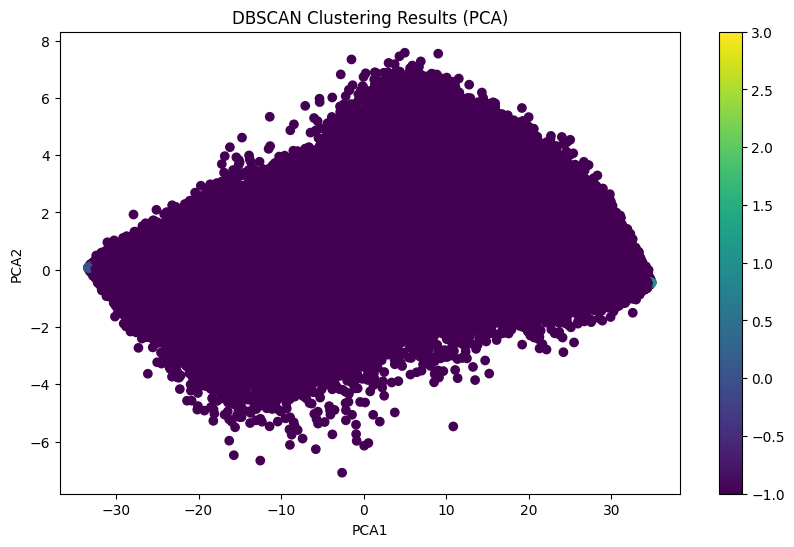

In [ ]:
## Visualizing the Clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Create a scatterplot to visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering Results (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()


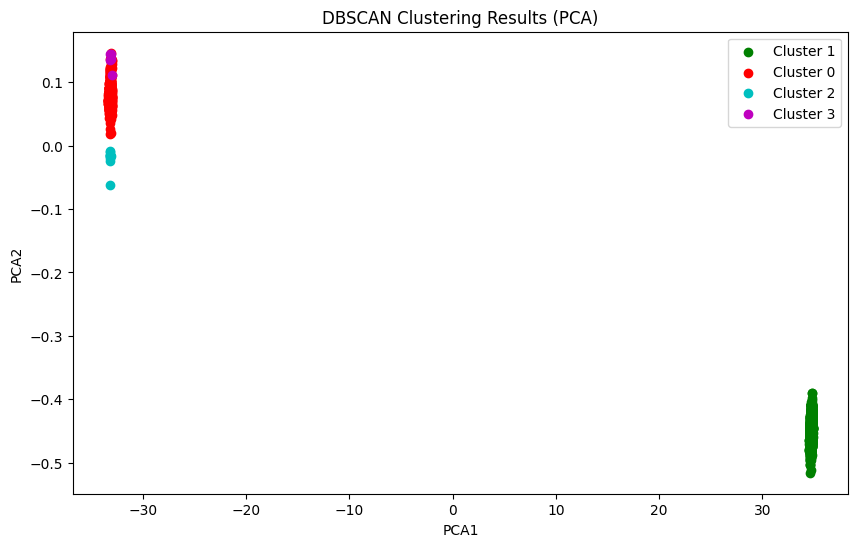

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Define a list of colors for each cluster
cluster_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink', 'brown', 'gray']

# Create a scatterplot to visualize the clusters with specified colors, excluding cluster = -1
plt.figure(figsize=(10, 6))
for cluster_label, color in zip(pca_df['Cluster'].unique(), cluster_colors):
    if cluster_label != -1:  # Exclude cluster = -1
        cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], c=color, label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering Results (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

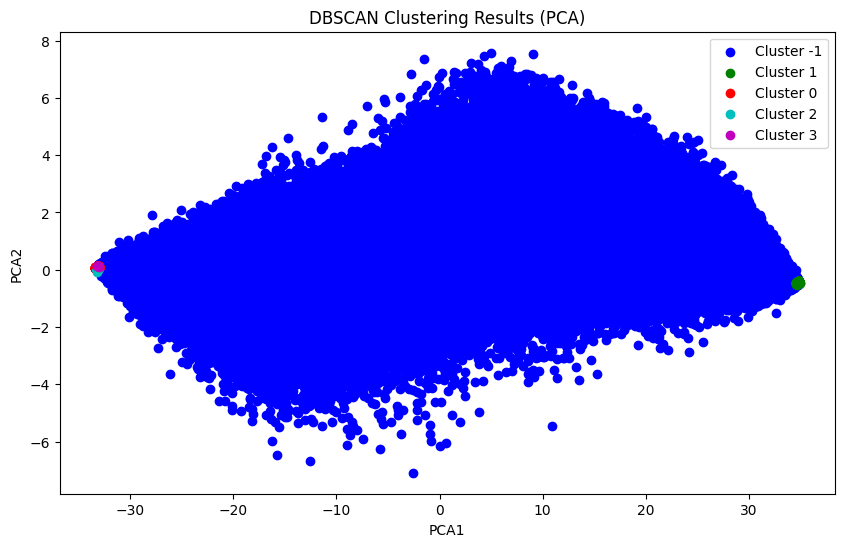

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Define a list of colors for each cluster
cluster_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink', 'brown', 'gray']

# Create a scatterplot to visualize the clusters with specified colors
plt.figure(figsize=(10, 6))
for cluster_label, color in zip(pca_df['Cluster'].unique(), cluster_colors):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], c=color, label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering Results (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Below is DBSCAN clustering algorithm perform on the filtered probes (filtered by R-squared)

#### Probes with R-squared > 0.7

In [ ]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data
scaled_data_07 = scaler.fit_transform(pivoted_samples_07)

# Convert the scaled data back to a DataFrame
scaled_df_07 = pd.DataFrame(scaled_data_07, columns=pivoted_samples_07.columns)

In [ ]:
print(scaled_df_07.head())

name  GSM989827  GSM989828  GSM989829  GSM989830  GSM989831  GSM989832  \
0     -0.687414  -0.791839  -0.531503  -0.537115  -0.704453  -0.621601   
1      1.029842   0.955419   0.967757   1.001787   0.907446   0.930355   
2     -1.383744  -1.339394  -1.404587  -1.447622  -1.407646  -1.352010   
3      0.874676   0.921703   0.812147   0.846279   0.875677   0.740001   
4     -0.835878  -0.894482  -0.731866  -0.976348  -0.967511  -0.885110   

name  GSM989833  GSM989834  GSM989835  GSM989836  ...  GSM990618  GSM990619  \
0     -1.504862  -0.706720  -0.589721  -0.609570  ...  -0.780746  -0.686549   
1      0.301097   1.002201   0.989843   0.851904  ...   1.001465   1.009070   
2     -0.830490  -1.414946  -1.320582  -1.370424  ...  -1.394922  -1.463771   
3      0.525292   0.894421   0.799190   0.861378  ...   0.831039   0.887973   
4     -1.640112  -1.239911  -0.838954  -1.040464  ...  -1.125221  -0.968292   

name  GSM990620  GSM990621  GSM990622  GSM990623  GSM990624  GSM990625  \
0     

#### Set max cpu cores to lower cpu temperature

In [ ]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set this to the number of CPU's physical cores

In [ ]:
## Applying DBSCAN
from sklearn.cluster import DBSCAN

# Create a DBSCAN clustering model
dbscan = DBSCAN(eps=8, min_samples=2)

# Fit the model to your scaled data
clusters = dbscan.fit_predict(scaled_data_07)

# Add the cluster labels to your DataFrame
scaled_df_07['Cluster'] = clusters


In [ ]:
print(scaled_df_07['Cluster'])

0     0
1     1
2     2
3     1
4     0
5     3
6     3
7     0
8     3
9     0
10    1
11    4
12    1
13    0
14    3
15    3
16    0
17    3
18    1
19    0
20    1
21    3
22    0
23    1
24    1
25    2
26    1
27    2
28    3
29    0
30    3
31    0
32   -1
33    0
34    1
35    4
36    1
37    1
38    0
39    1
40   -1
41    3
42    3
43    4
44   -1
45    4
46    3
47    0
48    3
49    0
50    0
51    1
52    2
Name: Cluster, dtype: int64


In [ ]:
# Calculate the summary of values in the 'Cluster' column
cluster_summary_07 = scaled_df_07['Cluster'].value_counts()

# Print the summary
print(cluster_summary_07)

Cluster
 0    15
 1    14
 3    13
 2     4
 4     4
-1     3
Name: count, dtype: int64


In [ ]:
pip install matplotlib

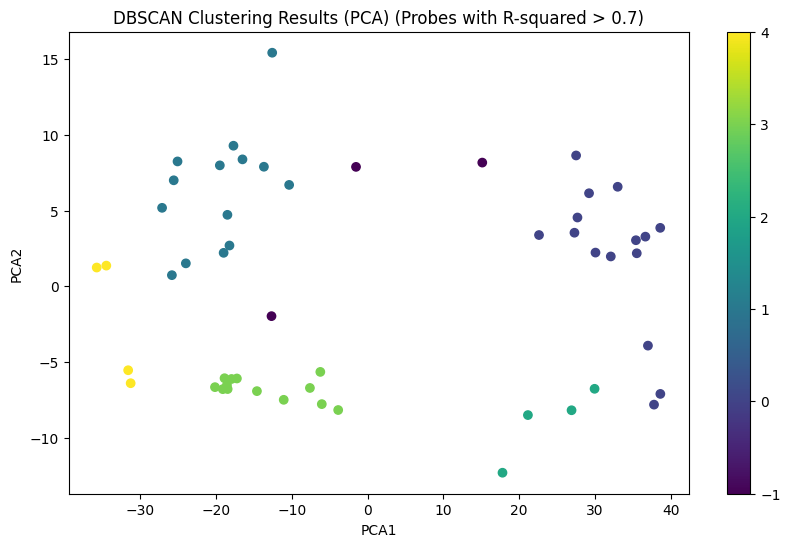

In [ ]:
## Visualizing the Clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data_07)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Create a scatterplot to visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering Results (PCA) (Probes with R-squared > 0.7)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()

#### Probes with R-squared > 0.5

In [ ]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data
scaled_data_05 = scaler.fit_transform(pivoted_samples_05)

# Convert the scaled data back to a DataFrame
scaled_df_05 = pd.DataFrame(scaled_data_05, columns=pivoted_samples_05.columns)

In [ ]:
# Check the dataframe of the scaled data
print(scaled_df_05.head())

name  GSM989827  GSM989828  GSM989829  GSM989830  GSM989831  GSM989832  \
0     -0.651068  -0.769595  -0.501839  -0.506965  -0.678284  -0.587208   
1      0.447777   0.494963   0.395154   0.399189   0.334218   0.464680   
2      1.161725   1.067680   1.083101   1.120618   1.024835   1.037474   
3     -1.386137  -1.345359  -1.424819  -1.469941  -1.421272  -1.351843   
4      1.208455   1.354189   1.370055   1.245022   1.307846   1.320585   

name  GSM989833  GSM989834  GSM989835  GSM989836  ...  GSM990618  GSM990619  \
0     -1.528597  -0.662589  -0.556921  -0.557386  ...  -0.730574  -0.649529   
1      0.735052   0.361277   0.370324   0.357327  ...   0.444240   0.547358   
2      0.248404   1.110374   1.110777   0.955746  ...   1.109916   1.104816   
3     -0.865038  -1.397357  -1.328561  -1.345133  ...  -1.364834  -1.453669   
4      1.233010   1.384758   1.306186   1.356920  ...   1.282237   1.180799   

name  GSM990620  GSM990621  GSM990622  GSM990623  GSM990624  GSM990625  \
0     

#### Set max cpu cores to lower cpu temperature

In [ ]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set this to the number of CPU's physical cores

In [ ]:
## Applying DBSCAN
from sklearn.cluster import DBSCAN

# Create a DBSCAN clustering model
dbscan = DBSCAN(eps=8, min_samples=2)

# Fit the model to your scaled data
clusters = dbscan.fit_predict(scaled_data_05)

# Add the cluster labels to your DataFrame
scaled_df_05['Cluster'] = clusters


In [ ]:
print(scaled_df_05['Cluster'])

0      0
1      1
2      1
3      0
4      1
      ..
104    1
105    2
106    0
107    1
108    1
Name: Cluster, Length: 109, dtype: int64


In [ ]:
# Calculate the summary of values in the 'Cluster' column
cluster_summary_05 = scaled_df_05['Cluster'].value_counts()

# Print the summary
print(cluster_summary_05)

Cluster
 1    63
 0    36
 2     7
-1     3
Name: count, dtype: int64


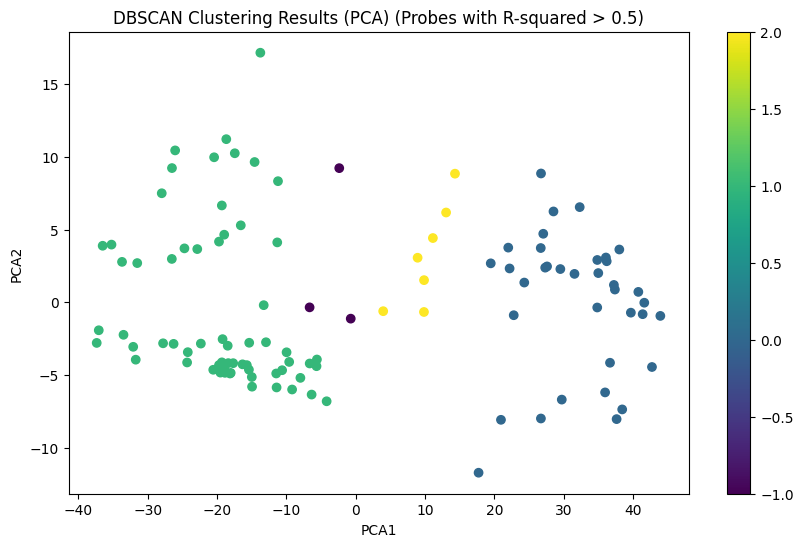

In [ ]:
## Visualizing the Clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data_05)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Create a scatterplot to visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering Results (PCA) (Probes with R-squared > 0.5)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()

In [ ]:
quit

### HDBSCANS model

In [43]:
pip install hdbscan

  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for cython<3,>=0.27 from https://files.pythonhosted.org/packages/3f/d6/9eed523aeaca42acbaa3e6d3850edae780dc7f8da9df1bf6a2ceb851839c/Cython-0.29.36-py2.py3-none-any.whl.metadata
  Using cached Cython-0.29.36-py2.py3-none-any.whl.metadata (3.1 kB)
Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
Failed to build hdbscan
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for hdbscan (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\flat.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\plots.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\validity.py -> build\lib.win-amd64-cpython-311\hdbscan
      copying hdbscan\__init__.py -> build\lib.win-amd64-cpython-311\hdbscan
      creating build\lib.win-amd64-cpython-311\hdbscan\tests
      copying hdbscan\tests\test_flat.py

In [ ]:
# Import the HDBSCAN library
import hdbscan

# Create an HDBSCAN clustering model
hdbscan_clusterer = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=5)

# Fit the model to your scaled data
hdbscan_clusters = hdbscan_clusterer.fit_predict(scaled_data)

# Add the cluster labels to your DataFrame
scaled_df['HDBSCAN_Cluster'] = hdbscan_clusters

# Calculate the summary of values in the 'HDBSCAN_Cluster' column
hdbscan_cluster_summary = scaled_df['HDBSCAN_Cluster'].value_counts()

# Print the summary
print(hdbscan_cluster_summary)

# Visualize the HDBSCAN clusters using PCA (similar to your DBSCAN visualization)
pca_hdbscan = PCA(n_components=2)
pca_hdbscan_result = pca_hdbscan.fit_transform(scaled_data)

# Create a DataFrame with PCA results for HDBSCAN
pca_hdbscan_df = pd.DataFrame(data=pca_hdbscan_result, columns=['PCA1', 'PCA2'])
pca_hdbscan_df['HDBSCAN_Cluster'] = hdbscan_clusters

# Create a scatterplot to visualize the HDBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_hdbscan_df['PCA1'], pca_hdbscan_df['PCA2'], c=pca_hdbscan_df['HDBSCAN_Cluster'], cmap='viridis')
plt.title('HDBSCAN Clustering Results (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar()
plt.show()


#### Below is original code 

In [ ]:
#Filtering out unexpressed probes
expression_threshold = pivoted_samples_average.quantile(0.3)
expressed_probes = pivoted_samples_average[pivoted_samples_average >= expression_threshold].index.tolist()
print("number of probes above threshold: ", len(expressed_probes))

number of probes above threshold:  331124


In [ ]:
#Redefine expression data using only the expressed probes
exprsdata = gse.pivot_samples("VALUE").loc[expressed_probes]
exprsdata = exprsdata.T
#Deletes additional samples that aren't being analyzed
exprsdata = exprsdata[exprsdata.index.isin(list_samples)]
#Drop any probe columns where expression data is missing or negative
exprsdata.dropna(axis = 1)

NameError: name 'list_samples' is not defined

: 

In [ ]:
#Quantile normalization of data
rank_mean = exprsdata.stack().groupby(exprsdata.rank(method='first').stack().astype(int)).mean()
exprsdata.rank(method='min').stack().astype(int).map(rank_mean).unstack()

ID_REF,1415670_PM_at,1415671_PM_at,1415672_PM_at,1415673_PM_at,1415674_PM_a_at,1415675_PM_at,1415676_PM_a_at,1415677_PM_at,1415678_PM_at,1415679_PM_at,...,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-r2-TagB_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagO-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM1326549,6.330278,6.432779,6.074890,6.168083,6.432779,6.245189,6.330278,6.330278,6.330278,6.330278,...,6.074890,6.074890,6.074890,6.168083,6.168083,6.168083,5.907094,6.245189,6.432779,5.907094
GSM1326550,6.600439,6.600439,5.907094,6.600439,6.600439,6.600439,6.600439,6.600439,5.907094,6.600439,...,6.432779,6.432779,6.432779,6.330278,6.330278,5.907094,6.074890,6.600439,6.245189,6.330278
GSM1326551,6.074890,6.168083,6.600439,5.907094,6.245189,6.074890,6.074890,6.168083,6.074890,6.168083,...,5.907094,5.907094,5.907094,6.074890,6.074890,6.074890,6.245189,6.330278,6.168083,6.245189
GSM1326552,5.907094,5.907094,6.245189,6.330278,6.074890,6.168083,5.907094,5.907094,6.432779,5.907094,...,6.330278,6.330278,6.330278,6.432779,6.432779,6.432779,6.432779,6.074890,6.600439,6.600439
GSM1326553,6.168083,6.074890,6.432779,6.074890,5.907094,6.245189,6.168083,6.074890,6.600439,6.245189,...,6.168083,6.245189,6.245189,6.245189,6.245189,6.330278,6.330278,6.168083,6.330278,6.432779
GSM1326554,6.432779,6.245189,6.168083,6.432779,6.330278,6.432779,6.432779,6.432779,6.245189,6.432779,...,6.245189,6.168083,6.168083,5.907094,5.907094,6.245189,6.168083,6.432779,6.074890,6.074890
GSM1326555,6.245189,6.330278,6.330278,6.245189,6.168083,5.907094,6.245189,6.245189,6.168083,6.074890,...,6.600439,6.600439,6.600439,6.600439,6.600439,6.600439,6.600439,5.907094,5.907094,6.168083


In [ ]:
#Compute PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(exprsdata)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
#Making Dataframe of samples to concatenate with principal components
samplesDf = pd.DataFrame.from_dict(all_samples, orient = 'index', columns = ['type'])
samplesDf.reset_index(inplace=True)

In [ ]:
#Concatenate sample data with PCA data
principalDf = pd.concat([samplesDf, principalDf], axis=1)
principalDf

,index,type,principal component 1,principal component 2,principal component 3
0,GSM1326549,control,8.594644,0.369740,9.840850
1,GSM1326550,control,74.705664,8.868083,8.417663
2,GSM1326551,control,-40.998394,-14.577642,23.329922
3,GSM1326552,treated,-37.498969,17.615843,-2.380319
4,GSM1326553,treated,-20.004035,22.974763,-11.090719
5,GSM1326554,treated,19.612695,-12.432511,-7.995981
6,GSM1326555,treated,-4.411605,-22.818275,-20.121416


In [ ]:
#PCA scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12,12))
ax = fig.gca(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)

types = ('control', 'treated')
colors = ['green', 'violet']
for type, color in zip(types, colors):
    indicesToKeep = principalDf['type'] == type
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'],
               principalDf.loc[indicesToKeep, 'principal component 2'], principalDf.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)
ax.legend(types)

TypeError: ignored

<Figure size 1200x1200 with 0 Axes>

In [ ]:
#Calculate variance ratio
pca.explained_variance_ratio_

array([0.6436185 , 0.12167545, 0.08828647])

In [ ]:
#Transpose data matrix for sorting, index correlated to probe IDs
exprsdata = exprsdata.T
exprsdata

name,GSM1326549,GSM1326550,GSM1326551,GSM1326552,GSM1326553,GSM1326554,GSM1326555
ID_REF,,,,,,,
1415670_PM_at,9.682183,9.880824,9.432104,9.331813,9.467232,9.699046,9.596045
1415671_PM_at,10.084613,10.526075,9.817309,9.406962,9.771655,10.012961,10.020050
1415672_PM_at,6.978157,6.598286,7.323166,7.056302,7.114557,6.978890,7.064719
1415673_PM_at,7.087708,7.486799,6.820598,7.089049,7.082327,7.136154,7.088280
1415674_PM_a_at,7.111530,7.386174,6.989748,6.809202,6.778237,7.019381,6.880839
1415675_PM_at,7.428983,7.868106,7.412727,7.423941,7.428983,7.536684,7.362699
1415676_PM_a_at,10.856926,11.002599,10.726939,10.681481,10.782074,10.936911,10.799768
1415677_PM_at,9.414557,9.757142,9.199426,9.019493,9.161784,9.479117,9.378351
1415678_PM_at,10.443569,10.220740,10.334905,10.471583,10.519036,10.430231,10.343568


In [ ]:
#Sort expression matrix using 800 genes with greatest variance
variances = np.var(exprsdata, axis=1)
srt_idx = variances.argsort()[::-1]
data_sub = exprsdata.iloc[srt_idx].iloc[:800]
data_sub.index = data_sub.index.map(str)
data_sub

name,GSM1326549,GSM1326550,GSM1326551,GSM1326552,GSM1326553,GSM1326554,GSM1326555
ID_REF,,,,,,,
1415994_PM_at,7.220758,9.889383,5.246760,8.567014,10.330730,9.177822,9.148437
1422651_PM_at,6.307225,8.746259,5.122033,7.662396,9.836162,8.116202,8.516480
1447733_PM_x_at,5.632917,3.976951,6.361501,7.185739,7.232304,6.687746,8.722426
1436453_PM_at,3.679207,6.011494,3.091251,3.886726,6.645105,5.713522,6.292786
1455696_PM_a_at,6.908131,4.675551,8.862734,8.657529,8.088245,7.171424,7.397144
1417600_PM_at,5.244625,4.649418,7.720450,8.509593,7.424009,5.933650,6.706952
1433924_PM_at,7.915459,5.986463,9.818358,9.922026,9.467739,8.783365,8.895620
1417867_PM_at,8.313750,10.893579,7.297770,9.481550,11.178194,9.841375,9.969093
1448665_PM_at,5.374812,3.599657,7.429408,7.222130,6.538073,5.181166,5.788622


In [ ]:
#Extract probe ids from data
probeids = list(data_sub.index)
probeids

['1415994_PM_at',
 '1422651_PM_at',
 '1447733_PM_x_at',
 '1436453_PM_at',
 '1455696_PM_a_at',
 '1417600_PM_at',
 '1433924_PM_at',
 '1417867_PM_at',
 '1448665_PM_at',
 '1442715_PM_at',
 '1457304_PM_at',
 '1415965_PM_at',
 '1428083_PM_at',
 '1423439_PM_at',
 '1415964_PM_at',
 '1439617_PM_s_at',
 '1417356_PM_at',
 '1424252_PM_at',
 '1436871_PM_at',
 '1440182_PM_at',
 '1417307_PM_at',
 '1428536_PM_at',
 '1437598_PM_at',
 '1439399_PM_a_at',
 '1460139_PM_at',
 '1425260_PM_at',
 '1436240_PM_at',
 '1455300_PM_at',
 '1457327_PM_at',
 '1449095_PM_at',
 '1431610_PM_at',
 '1446947_PM_at',
 '1443534_PM_at',
 '1425522_PM_at',
 '1447767_PM_at',
 '1452774_PM_at',
 '1420992_PM_at',
 '1457017_PM_at',
 '1447859_PM_at',
 '1446127_PM_at',
 '1426124_PM_a_at',
 '1428539_PM_at',
 '1422108_PM_at',
 '1456089_PM_at',
 '1433537_PM_at',
 '1447345_PM_at',
 '1437862_PM_at',
 '1446603_PM_at',
 '1447977_PM_x_at',
 '1454774_PM_at',
 '1428467_PM_at',
 '1453688_PM_at',
 '1415872_PM_at',
 '1442710_PM_at',
 '1435391_PM_at'

In [ ]:
#Upload annotation file as dictionary
dict1 = {}
with open('../data/probe2gene.txt') as f:
    for line in f:
        line = line.strip()
        (platform, probe, symbol) = line.split()
        dict1[probe] = symbol

In [ ]:
#Examine how many ids are duplicates for gene symbols/unmatched
len(set(probeids) - dict1.keys())

257

In [ ]:
#Reset index and replace with gene symbols, view as dataframe
exprsdata = pd.DataFrame(exprsdata)
exprsdata['symbol'] = exprsdata.index.to_series().map(dict1)
exprsdata.reset_index(inplace=True)
data = exprsdata.set_index('symbol')
#Drop probe id column
data = data.drop('ID_REF', axis=1)
data

name,GSM1326549,GSM1326550,GSM1326551,GSM1326552,GSM1326553,GSM1326554,GSM1326555
symbol,,,,,,,
COPG1,9.682183,9.880824,9.432104,9.331813,9.467232,9.699046,9.596045
ATP6V0D1,10.084613,10.526075,9.817309,9.406962,9.771655,10.012961,10.020050
GOLGA7,6.978157,6.598286,7.323166,7.056302,7.114557,6.978890,7.064719
PSPH,7.087708,7.486799,6.820598,7.089049,7.082327,7.136154,7.088280
TRAPPC4,7.111530,7.386174,6.989748,6.809202,6.778237,7.019381,6.880839
DPM2,7.428983,7.868106,7.412727,7.423941,7.428983,7.536684,7.362699
PSMB5,10.856926,11.002599,10.726939,10.681481,10.782074,10.936911,10.799768
DHRS1,9.414557,9.757142,9.199426,9.019493,9.161784,9.479117,9.378351
PPM1A,10.443569,10.220740,10.334905,10.471583,10.519036,10.430231,10.343568


In [ ]:
#Drop rows that aren't associated with a particular gene symbol
data = data.reset_index().dropna().set_index('symbol')
data

name,GSM1326549,GSM1326550,GSM1326551,GSM1326552,GSM1326553,GSM1326554,GSM1326555
symbol,,,,,,,
COPG1,9.682183,9.880824,9.432104,9.331813,9.467232,9.699046,9.596045
ATP6V0D1,10.084613,10.526075,9.817309,9.406962,9.771655,10.012961,10.020050
GOLGA7,6.978157,6.598286,7.323166,7.056302,7.114557,6.978890,7.064719
PSPH,7.087708,7.486799,6.820598,7.089049,7.082327,7.136154,7.088280
TRAPPC4,7.111530,7.386174,6.989748,6.809202,6.778237,7.019381,6.880839
DPM2,7.428983,7.868106,7.412727,7.423941,7.428983,7.536684,7.362699
PSMB5,10.856926,11.002599,10.726939,10.681481,10.782074,10.936911,10.799768
DHRS1,9.414557,9.757142,9.199426,9.019493,9.161784,9.479117,9.378351
PPM1A,10.443569,10.220740,10.334905,10.471583,10.519036,10.430231,10.343568


In [ ]:
#Standardized data to a text file
data_file = ('../expression_matrix_top800_genes.txt')
data.to_csv(data_file, sep='\t')
data_file

'../expression_matrix_top800_genes.txt'

In [ ]:
#Import required packages for characteristic direction and utilize warning statements
import warnings
from scipy.stats import chi2
from scipy.stats.mstats import zscore
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
#Make sample classes, ensure that there is a distinction between control/treated samples
data_cd = {}

sample_classes = {}
sample_class = np.zeros(data.shape[1], dtype=np.int32)
sample_class[samplesDf['type'].values == 'control'] = 1
sample_class[samplesDf['type'].values == 'treated'] = 2
sample_classes = sample_class

print(sample_classes)

[1 1 1 2 2 2 2]


In [ ]:
#CD results
cd_res = chdir(data.values, sample_classes, data.index, gamma=.5, sort=False, calculate_sig=False)
cd_coefs = np.array(list(map(lambda x: x[0], cd_res)))

srt_idx = np.abs(cd_coefs).argsort()[::-1]
cd_coefs = cd_coefs[srt_idx][:600]
sorted_DEGs = data.index[srt_idx][:600]
up_genes = dict(zip(sorted_DEGs[cd_coefs > 0], cd_coefs[cd_coefs > 0]))
dn_genes = dict(zip(sorted_DEGs[cd_coefs < 0], cd_coefs[cd_coefs < 0]))
data_cd['up'] = up_genes
data_cd['dn'] = dn_genes

In [ ]:
#Retrieve up and down gene sets
up_list = list(up_genes.keys())
dn_list = list(dn_genes.keys())

In [ ]:
import json
import requests

ENRICHR_URL = 'https://amp.pharm.mssm.edu/Enrichr'

def _enrichr_add_list(genes, meta=''):
    genes_str = '\n'.join(genes)
    payload = {
        'list': (None, genes_str),
        'description': (None, meta)
    }
    # POST genes to the /addList endpoint
    response = requests.post("%s/addList" % ENRICHR_URL, files=payload)
    list_ids = json.loads(response.text)
    return list_ids

def enrichr_link(genes, meta=''):
    list_ids = _enrichr_add_list(genes, meta)
    shortId = list_ids['shortId']
    link = '%s/enrich?dataset=%s' % (ENRICHR_URL, shortId)
    return link

In [ ]:
#Print Enrichr links for further analysis
for key, d in data_cd.items():
    time.sleep(1)
    genes = list(data_cd[key].keys())
    genes = [str(g) for g in genes]
    link = enrichr_link(genes, key)
    print(key)
    print(link)

up
https://amp.pharm.mssm.edu/Enrichr/enrich?dataset=5661d17d7606ea995d76875ab180fe68
dn
https://amp.pharm.mssm.edu/Enrichr/enrich?dataset=8ffebe6b83be738677653ee78dda99cb
